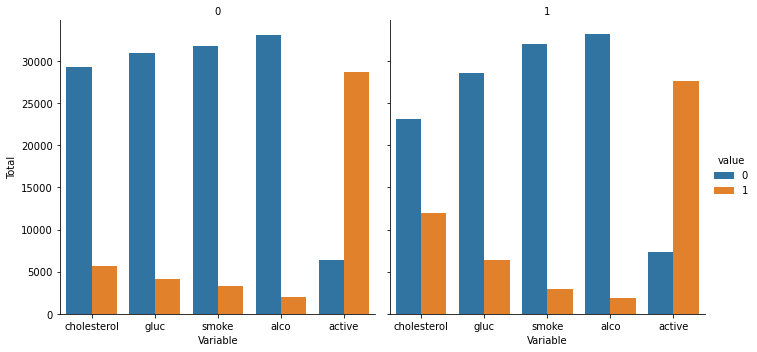

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

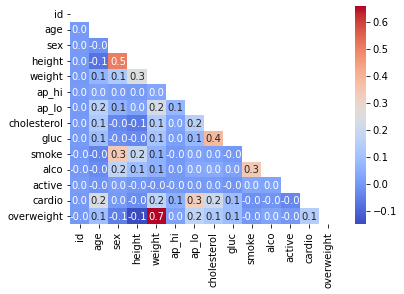

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('medical_examination.csv')

# Add overweight column
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)

# Normalize cholesterol and gluc
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

# Create a chart for categorical features
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active'])

# Plot the categorical features
fig = sns.catplot(data=df_cat, kind='count', x='variable', hue='value', col='cardio')
fig.set_axis_labels('Variable', 'Total')
fig.set_titles('{col_name}')
plt.show()

# Clean the data
df = df[(df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))]

# Create a correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt='.1f', mask=mask, cmap='coolwarm')

# Display the plot
plt.show()
